In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import re

In [2]:
dataset = pd.read_csv('./dataset/HzAGN_Groups_0_3_noMcut_InfallTime_matched.csv')

In [6]:
dataset

,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
0,3077,1,22,3553,-0.15976,-0.46951,0.99832,0.0,0.0,0.0,...,0.00785,254.1469,0.01259,198.174662,184.286400,135.840450,0,0.348211,1,9
1,3077,1,23,3554,-0.15756,-0.46617,0.99835,0.0,0.0,0.0,...,0.00785,284.0533,0.01259,198.174662,184.286400,135.840450,0,0.262511,1,9
2,3077,1,24,3560,-0.16319,-0.47106,0.99822,0.0,0.0,0.0,...,0.00785,208.1544,0.01259,198.174662,184.286400,135.840450,0,0.827232,1,9
3,3077,1,25,3561,-0.16792,-0.46637,0.99826,0.0,0.0,0.0,...,0.00785,265.0288,0.01259,198.174662,184.286400,135.840450,0,1.366920,1,9
4,3077,1,26,3793,-0.16778,-0.46684,0.99814,0.0,0.0,0.0,...,0.00785,222.6391,0.01259,198.174662,184.286400,135.840450,0,1.340197,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,2285551,0,45857,2171798,-0.49292,-0.42343,2.00457,0.0,0.0,0.0,...,0.00527,372.1910,0.00981,127.498099,191.825297,225.736693,0,0.317573,2604,12
45204,2285551,0,45858,2171799,-0.49142,-0.42515,2.00458,0.0,0.0,0.0,...,0.00527,237.7404,0.00981,127.498099,191.825297,225.736693,0,0.115515,2604,12
45205,2285551,0,45859,2171800,-0.49119,-0.42541,2.00461,0.0,0.0,0.0,...,0.00527,176.4346,0.00981,127.498099,191.825297,225.736693,0,0.181381,2604,12
45206,2285551,0,45854,2171343,-0.49285,-0.42169,2.00457,0.0,0.0,0.0,...,0.00527,206.9181,0.00981,127.498099,191.825297,225.736693,1,0.603060,2604,12


In [6]:
dataset.columns

Index(['idgroup_1', 'relax', 'ID_1', 'id[1]', 'Ra[2]', 'Dec[3]', 'z[4]',
       'zphot[5]', 'zphotup[6]', 'zphotdown[7]',
       ...
       'Rvir_deg', 'vsig', 'Rmax_deg', 'sigma_vz', 'sigma_vy', 'sigma_vx',
       'rank_gg', 'offset', 'GroupID', 'GroupSize'],
      dtype='object', length=107)

In [19]:
dataset_groupby_idgroup = dataset.groupby('idgroup_1')

In [23]:
dataset['idgroup_1'].nunique()

2604

In [19]:
type(dataset_groupby_idgroup)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
dataset_groupby_idgroup.ngroups

2604

In [26]:
# Those integer numbers in the list are the row number.
dataset_groupby_idgroup.groups

{2440: [36017, 36018, 36019, 36020, 36021, 36022, 36023, 36024, 36025, 36026, 36027, 36028, 36029, 36030, 36031, 36032, 36033, 36034, 36035], 3077: [0, 1, 2, 3, 4, 5, 6, 7, 8], 3841: [36036, 36037, 36038, 36039, 36040, 36041, 36042, 36043, 36044, 36045, 36046, 36047, 36048, 36049, 36050, 36051, 36052, 36053, 36054, 36055, 36056, 36057, 36058, 36059, 36060, 36061, 36062, 36063, 36064, 36065, 36066, 36067, 36068, 36069, 36070, 36071, 36072, 36073, 36074, 36075, 36076, 36077, 36078, 36079], 7849: [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], 8384: [36080, 36081, 36082, 36083, 36084, 36085, 36086, 36087, 36088, 36089, 36090, 36091, 36092, 36093], 10455: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], 11157: [42, 43, 44], 13474: [36094, 36095, 36096, 36097, 36098], 14413: [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], 18692: [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,

In [30]:
dataset_groupby_idgroup.size()

idgroup_1
2440       19
3077        9
3841       44
7849       14
8384       14
           ..
2285551    12
2286368    16
2287631    11
2287758    21
2288475    11
Length: 2604, dtype: int64

In [34]:
dataset_groupby_idgroup.first()

,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],logMsim[8],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
idgroup_1,,,,,,,,,,,,,,,,,,,,,
2440,0,2,2687,-0.20144,-0.44451,0.99862,0.0,0.0,0.0,8.19815,...,0.00680,230.0955,0.02414,219.977147,157.029307,203.967738,0,0.248314,1942,19
3077,1,22,3553,-0.15976,-0.46951,0.99832,0.0,0.0,0.0,9.16294,...,0.00785,254.1469,0.01259,198.174662,184.286400,135.840450,0,0.348211,1,9
3841,0,29,3783,-0.30316,-0.21131,0.99811,0.0,0.0,0.0,10.05179,...,0.01087,123.7972,0.01917,252.203696,310.493898,277.164201,0,0.194225,1943,44
7849,1,76,8634,-0.03976,0.42424,0.99651,0.0,0.0,0.0,8.53822,...,0.00928,116.3586,0.01456,179.000164,248.901093,180.226247,0,0.381185,2,14
8384,0,89,8960,0.11031,-0.43821,0.99636,0.0,0.0,0.0,9.07291,...,0.00812,234.1203,0.01740,200.137639,291.209415,130.720944,0,1.069231,1944,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285551,0,45848,2171143,-0.48874,-0.42568,2.00474,0.0,0.0,0.0,9.14059,...,0.00527,216.0488,0.00981,127.498099,191.825297,225.736693,0,0.615105,2604,12
2286368,1,45860,2171715,0.40155,0.06554,2.00364,0.0,0.0,0.0,9.94574,...,0.00507,310.7916,0.00812,194.544544,219.604066,286.553117,0,0.723713,1938,16
2287631,1,45876,2173166,0.11929,-0.14880,2.00151,0.0,0.0,0.0,8.18745,...,0.00002,379.3541,0.00694,213.435981,148.588318,215.850221,0,132.824802,1939,11


In [36]:
dataset_groupby_idgroup.last()

,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],logMsim[8],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
idgroup_1,,,,,,,,,,,,,,,,,,,,,
2440,0,5,3113,-0.19975,-0.44434,0.99842,0.0,0.0,0.0,10.97645,...,0.00680,158.07160,0.02415,219.977147,157.029307,203.967738,31,0.001470,1942,19
3077,1,21,3552,-0.15736,-0.46824,0.99832,0.0,0.0,0.0,11.14308,...,0.00785,208.31890,0.01259,198.174662,184.286400,135.840450,31,0.002848,1,9
3841,0,40,4607,-0.30121,-0.21037,0.99784,0.0,0.0,0.0,11.15420,...,0.01087,133.86070,0.01917,252.203696,310.493898,277.164201,31,0.008230,1943,44
7849,1,75,8631,-0.04292,0.42587,0.99647,0.0,0.0,0.0,11.12494,...,0.00928,73.76215,0.01456,179.000164,248.901093,180.226247,31,0.004310,2,14
8384,0,97,9318,0.11728,-0.43293,0.99628,0.0,0.0,0.0,11.11869,...,0.00812,223.48920,0.01740,200.137639,291.209415,130.720944,31,0.016198,1944,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285551,0,45856,2171376,-0.49183,-0.42467,2.00461,0.0,0.0,0.0,11.03483,...,0.00527,241.98850,0.00981,127.498099,191.825297,225.736693,31,0.005689,2604,12
2286368,1,45863,2171847,0.40125,0.06925,2.00338,0.0,0.0,0.0,11.02214,...,0.00507,157.70360,0.00812,194.544544,219.604066,286.553117,31,0.012629,1938,16
2287631,1,45879,2173202,0.12015,-0.14623,2.00143,0.0,0.0,0.0,11.21735,...,0.00002,104.67240,0.00694,213.435981,148.588318,215.850221,31,3.041714,1939,11


In [37]:
dataset_groupby_idgroup.last()

,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],logMsim[8],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
idgroup_1,,,,,,,,,,,,,,,,,,,,,
2440,0,5,3113,-0.19975,-0.44434,0.99842,0.0,0.0,0.0,10.97645,...,0.00680,158.07160,0.02415,219.977147,157.029307,203.967738,31,0.001470,1942,19
3077,1,21,3552,-0.15736,-0.46824,0.99832,0.0,0.0,0.0,11.14308,...,0.00785,208.31890,0.01259,198.174662,184.286400,135.840450,31,0.002848,1,9
3841,0,40,4607,-0.30121,-0.21037,0.99784,0.0,0.0,0.0,11.15420,...,0.01087,133.86070,0.01917,252.203696,310.493898,277.164201,31,0.008230,1943,44
7849,1,75,8631,-0.04292,0.42587,0.99647,0.0,0.0,0.0,11.12494,...,0.00928,73.76215,0.01456,179.000164,248.901093,180.226247,31,0.004310,2,14
8384,0,97,9318,0.11728,-0.43293,0.99628,0.0,0.0,0.0,11.11869,...,0.00812,223.48920,0.01740,200.137639,291.209415,130.720944,31,0.016198,1944,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285551,0,45856,2171376,-0.49183,-0.42467,2.00461,0.0,0.0,0.0,11.03483,...,0.00527,241.98850,0.00981,127.498099,191.825297,225.736693,31,0.005689,2604,12
2286368,1,45863,2171847,0.40125,0.06925,2.00338,0.0,0.0,0.0,11.02214,...,0.00507,157.70360,0.00812,194.544544,219.604066,286.553117,31,0.012629,1938,16
2287631,1,45879,2173202,0.12015,-0.14623,2.00143,0.0,0.0,0.0,11.21735,...,0.00002,104.67240,0.00694,213.435981,148.588318,215.850221,31,3.041714,1939,11


In [44]:
data_2440 = dataset_groupby_idgroup.get_group(2440)

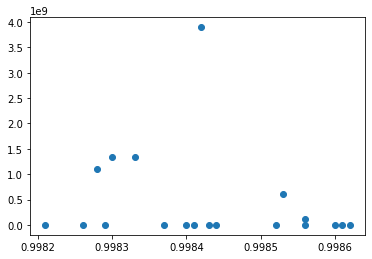

In [52]:
plt.plot(data_2440['z[4]'],data_2440['t(Myr)[col2]'], 'o')

In [4]:
dataset_group_Mstar = dataset.groupby('M*_0[col10]')

In [6]:
dataset_group_Mstar.ngroups

29889

In [7]:
dataset_group_Mstar.groups

{0.0: [0, 1, 3, 5, 6, 7, 9, 12, 14, 15, 16, 17, 18, 19, 20, 23, 24, 28, 31, 32, 33, 34, 35, 36, 39, 40, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 70, 71, 76, 78, 79, 81, 82, 83, 85, 86, 88, 89, 90, 95, 99, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 120, 122, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 138, 140, 141, 142, 145, 146, 154, 155, 156, ...], 8.23117: [39515, 39521], 8.23629: [10575], 8.23755: [38475], 8.23828: [9140], 8.2384: [6825], 8.23875: [6377, 7500], 8.23931: [9840], 8.23966: [37428], 8.2402: [1559], 8.24024: [4516], 8.24057: [2694, 2715], 8.24109: [12173], 8.24122: [1744, 1746], 8.24137: [36507], 8.24157: [11658], 8.24168: [4142], 8.24175: [40591], 8.24209: [7113], 8.24236: [1959], 8.24274: [15035], 8.24337: [12853], 8.24392: [8912], 8.24501: [19509], 8.24581: [10226], 8.24714: [19862], 8.24739: [6956, 8581], 8.24755: [10749], 8.24759: [15039], 8.24765: [38035], 8.24795: [5390], 8.

In [11]:
dataset_group_Mstar.size()

M*_0[col10]
0.00000     11589
8.23117         2
8.23629         1
8.23755         1
8.23828         1
            ...  
12.15499        1
12.15714        1
12.20041        1
12.30202        1
12.56858        1
Length: 29889, dtype: int64

In [12]:
dataset_group_Mstar.first()

,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
M*_0[col10],,,,,,,,,,,,,,,,,,,,,
0.00000,3077,1,22,3553,-0.15976,-0.46951,0.99832,0.0,0.0,0.0,...,0.00785,254.1469,0.01259,198.174662,184.286400,135.840450,0,0.348211,1,9
8.23117,1094606,0,15997,1013982,0.47145,-0.19340,0.20525,0.0,0.0,0.0,...,0.07309,583.1860,0.13481,379.863311,298.314747,451.521060,0,0.622760,2225,21
8.23629,1014244,1,13665,955587,0.22731,0.09008,0.37488,0.0,0.0,0.0,...,0.02412,284.5748,0.04756,330.236628,363.103458,223.024285,0,0.970065,546,36
8.23755,914764,0,11599,872905,-0.46730,0.05719,0.49035,0.0,0.0,0.0,...,0.01482,172.4126,0.02284,218.721896,258.133013,144.014037,0,0.349007,2129,30
8.23828,915430,1,11641,873485,0.08256,-0.04502,0.48969,0.0,0.0,0.0,...,0.01866,113.5448,0.03039,207.884064,296.937310,244.401829,0,0.603492,461,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12.15499,598719,1,7532,583568,-0.09600,-0.49070,0.71522,0.0,0.0,0.0,...,0.03347,429.8657,0.14186,674.057156,662.170362,674.460162,31,0.000298,302,91
12.15714,1086018,1,15203,1009512,0.11213,-0.28791,0.23047,0.0,0.0,0.0,...,0.07785,259.4116,0.10627,428.476986,466.909325,641.539583,31,0.000129,608,94
12.20041,68349,1,908,69400,-0.49797,-0.10689,0.97001,0.0,0.0,0.0,...,0.02112,248.0210,0.03727,734.461337,652.109454,600.555580,31,0.001496,33,29


In [16]:
dataset_group_z = dataset.groupby('z[4]')

In [17]:
dataset_group_z.ngroups

29505

In [18]:
dataset_group_z.groups

{0.07902: [39565], 0.07906: [39566], 0.07907: [39564], 0.07908: [39563], 0.07914: [39561], 0.07915: [39562], 0.07938: [39559], 0.07946: [39560], 0.08801: [12445], 0.08806: [12428], 0.08807: [12433], 0.08809: [12427, 12431, 12432], 0.0881: [12426, 12429, 12430, 12444], 0.08812: [12434], 0.08813: [12423], 0.08814: [12419, 12421, 12422, 12439], 0.08815: [12420, 12424, 12443], 0.08816: [12416, 12417], 0.08817: [12415, 12418, 12436, 12438], 0.08818: [12413, 12437, 12447], 0.08819: [12414, 12425], 0.0882: [12440, 12442], 0.08821: [12409, 12435, 12441], 0.08822: [12404, 12406, 12407], 0.08823: [12400, 12401, 12411, 12446], 0.08824: [12405], 0.08825: [12398, 12402], 0.08826: [12408], 0.08827: [12403, 12410], 0.08828: [12399, 12412], 0.0883: [12395], 0.08831: [12396], 0.08832: [12397], 0.08834: [12393], 0.08835: [12394], 0.08877: [39557], 0.08879: [39556], 0.08881: [39558], 0.08989: [12391], 0.09: [12390, 12392], 0.09004: [12389], 0.09438: [12383], 0.09439: [12384, 12385], 0.0944: [12387], 0.09